In [1]:
# Author: Anik Halder (ahalder@usm.lmu.de)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_g = '0.6'
NSIDE = 2048

tomo_Map = 'tomo3' # will be used for computing the aperture mass
tomo_xiA = 'tomo3' # will be used for computing position dependent 2PCF
tomo_xiB = 'tomo3' # will be used for computing position dependent 2PCF

extension = 'bin_slop_0' # e.g. bin_slop_0, default_bin_slop
if ('bin_slop_0' in extension):
    bin_slop_val = 0
    extension = '_' + extension
elif ('default_bin_slop' in extension):
    extension = '_' + extension

do_2PCF = False
min_sep_tc_xi = 5 # treecorr min sep in arcmins 
max_sep_tc_xi = 170 # treecorr max sep in arcmins
nbins_tc_xi = 15 # treecorr no. of bins (should be an integer)
filepath_output_2PCF = './measurements/2PCF/'+tomo_xiA+'_'+tomo_xiB+'_All_'+n_g+'GpAM/NSIDE_'+str(NSIDE)+'/2PCFs_outputs'+extension+'/'

theta_Q_arcmins = 90 # patch radius in arcmins 
theta_T_arcmins = 90 # patch radius in arcmins 
min_sep_tc = 5 # treecorr min sep in arcmins 
max_sep_tc = 2*theta_T_arcmins-10 # treecorr max sep in arcmins
nbins_tc = 15 # treecorr no. of bins (should be an integer)

filepath_output = './measurements/shear_Q'+str(int(theta_Q_arcmins))+'W'+str(int(theta_T_arcmins))+'W'+str(int(theta_T_arcmins))+'/'+tomo_Map+'_'+tomo_xiA+'_'+tomo_xiB+'_All_'+n_g+'GpAM/NSIDE_'+str(NSIDE)+'/position_dependent_outputs'+extension+'/'


In [3]:
if (do_2PCF):
    dat_xi_theta = np.loadtxt(filepath_output_2PCF+'/xi_ss.out', usecols=[0])
    dat_xip = np.loadtxt(filepath_output_2PCF+'/xi_ss.out', usecols=[3])
    dat_xip_std = np.loadtxt(filepath_output_2PCF+'/xi_ss.out', usecols=[7])
    dat_xim = np.loadtxt(filepath_output_2PCF+'/xi_ss.out', usecols=[4])
    dat_xim_std = np.loadtxt(filepath_output_2PCF+'/xi_ss.out', usecols=[8])

    pre_factor = 1e4
    plt.figure(figsize=(9,5.5))
    plt.errorbar(dat_xi_theta,pre_factor*dat_xi_theta*dat_xip,yerr=pre_factor*dat_xi_theta*dat_xip_std,c='b',fmt='o',capsize=2,label='$\\xi_{+}$')
    plt.errorbar(dat_xi_theta,pre_factor*dat_xi_theta*dat_xim,yerr=pre_factor*dat_xi_theta*dat_xim_std,c='r',fmt='o',capsize=2,label='$\\xi_{-}$')
    plt.axhline(0., ls='dotted', c='k')

    plt.xscale('log')
    plt.xlabel('$\\theta$ [arcmins]', fontsize=15)
    plt.ylabel('$\\theta$ $\\xi_{\pm}$ [$10^{-4}$ arcmins]', fontsize=15)
    plt.legend(loc='best', fontsize=15, bbox_to_anchor=[1.0, 1.02])
    plt.tick_params(labelsize=15)
    plt.title('Shear 2PCF in SkySim5000 '+tomo_xiA+'_'+tomo_xiB+' (NSIDE=2048)', fontsize=15)

In [4]:
dat_Re = np.loadtxt(filepath_output+'/average_over_patches_Re_footprint.dat')
dat_Re_std = np.loadtxt(filepath_output+'/stddev_of_mean_over_patches_Re_footprint.dat')
dat_Im = np.loadtxt(filepath_output+'/average_over_patches_Im_footprint.dat')
dat_Im_std = np.loadtxt(filepath_output+'/stddev_of_mean_over_patches_Im_footprint.dat')

N = 1052 # number of patches
xi_pp_cov = np.loadtxt(filepath_output+'/cov_over_patches_xi_pp_Re_footprint.dat')/N
xi_mm_cov = np.loadtxt(filepath_output+'/cov_over_patches_xi_mm_Re_footprint.dat')/N
zeta_app_cov = np.loadtxt(filepath_output+'/cov_over_patches_zeta_app_Re_footprint.dat')/N
zeta_amm_cov = np.loadtxt(filepath_output+'/cov_over_patches_zeta_amm_Re_footprint.dat')/N

Text(0.5, 1.0, 'Integrated shear 3PCF in SkySim5000 tomo3_tomo3_tomo3 filters: U,W=90')

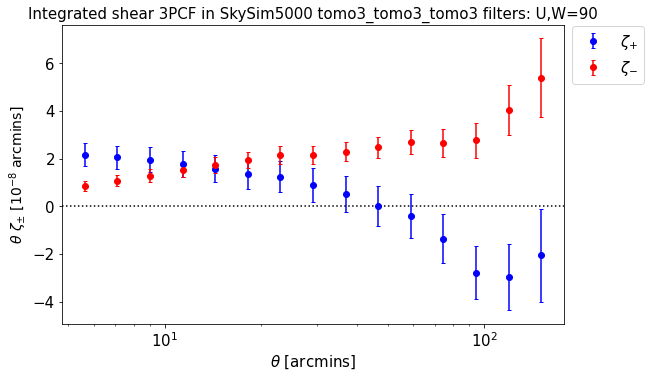

In [5]:
pre_factor = 1e8
plt.figure(figsize=(9,5.5))
plt.errorbar(dat_Re[:,0],pre_factor*dat_Re[:,0]*dat_Re[:,4],yerr=pre_factor*dat_Re[:,0]*np.sqrt(np.diag(zeta_app_cov)),c='b',fmt='o',capsize=2,label='$\\zeta_{+}$')
plt.errorbar(dat_Re[:,0],pre_factor*dat_Re[:,0]*dat_Re[:,5],yerr=pre_factor*dat_Re[:,0]*np.sqrt(np.diag(zeta_amm_cov)),c='r',fmt='o',capsize=2,label='$\\zeta_{-}$')
plt.axhline(0., ls='dotted', c='k')
plt.xscale('log')
plt.xlabel('$\\theta$ [arcmins]', fontsize=15)
plt.ylabel('$\\theta$ $\\zeta_{\pm}$ [$10^{-8}$ arcmins]', fontsize=14)
plt.legend(loc='best', fontsize=15, bbox_to_anchor=[1.0, 1.02])
plt.tick_params(labelsize=15)
plt.title('Integrated shear 3PCF in SkySim5000 '+tomo_Map+'_'+tomo_xiA+'_'+tomo_xiB+' filters: U,W='+str(theta_Q_arcmins), fontsize=15)
#plt.savefig('SkySim5000_shear_i3PCF_HMCODE_HALOFIT.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Average of position dependent shear 2PCF in SkySim5000 tomo3_tomo3 (NSIDE=2048)')

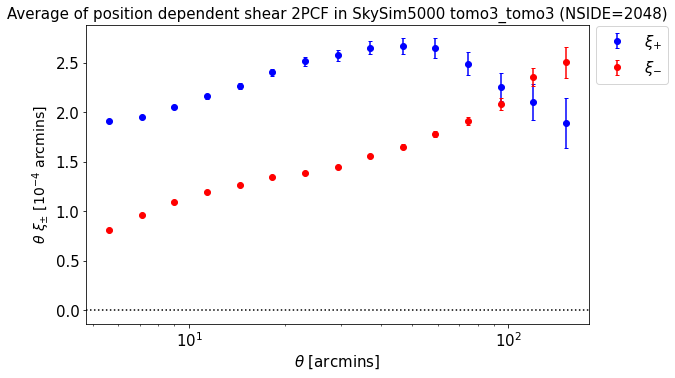

In [6]:
pre_factor = 1e4
plt.figure(figsize=(9,5.5))
plt.errorbar(dat_Re[:,0],pre_factor*dat_Re[:,0]*dat_Re[:,2],yerr=pre_factor*dat_Re[:,0]*np.sqrt(np.diag(xi_pp_cov)),c='b',fmt='o',capsize=2,label='$\\xi_{+}$')
plt.errorbar(dat_Re[:,0],pre_factor*dat_Re[:,0]*dat_Re[:,3],yerr=pre_factor*dat_Re[:,0]*np.sqrt(np.diag(xi_mm_cov)),c='r',fmt='o',capsize=2,label='$\\xi_{-}$')
plt.axhline(0., ls='dotted', c='k')
plt.xscale('log')
plt.xlabel('$\\theta$ [arcmins]', fontsize=15)
plt.ylabel('$\\theta$ $\\xi_{\pm}$ [$10^{-4}$ arcmins]', fontsize=14)
plt.legend(loc='best', fontsize=15, bbox_to_anchor=[1.0, 1.02])
plt.tick_params(labelsize=15)
plt.title('Average of position dependent shear 2PCF in SkySim5000 '+tomo_xiA+'_'+tomo_xiB+' (NSIDE=2048)', fontsize=15)
#plt.savefig('SkySim5000_shear_i3PCF_HMCODE_HALOFIT.png',dpi=100, bbox_inches='tight')